<a href="https://colab.research.google.com/github/Abdelrahman-gabr/ML-Specialization/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/auto-mpg.csv')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
temp = df[df.horsepower.str.isnumeric()]
temp.horsepower = temp.horsepower.astype('float')
horsepower_mean = temp.horsepower.mean()
horsepower_mean
df.horsepower.replace('?',horsepower_mean,inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', np.float64(104.46938775510205), '100', '105',
       '175', '153', '180', '110', '72', '86', '70', '76', '65', '69',
       '60', '80', '54', '208', '155', '112', '92', '145', '137', '158',
       '167', '94', '107', '230', '49', '75', '91', '122', '67', '83',
       '78', '52', '61', '93', '148', '129', '96', '71', '98', '115',
       '53', '81', '79', '120', '152', '102', '108', '68', '58', '149',
       '89', '63', '48', '66', '139', '103', '125', '133', '138', '135',
       '142', '77', '62', '132', '84', '64', '74', '116', '82'],
      dtype=object)

In [12]:
df['horsepower'] = df['horsepower'].astype('float').explode()

In [13]:
df.horsepower.unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [15]:
df.drop(columns='car name',inplace=True)

<Axes: >

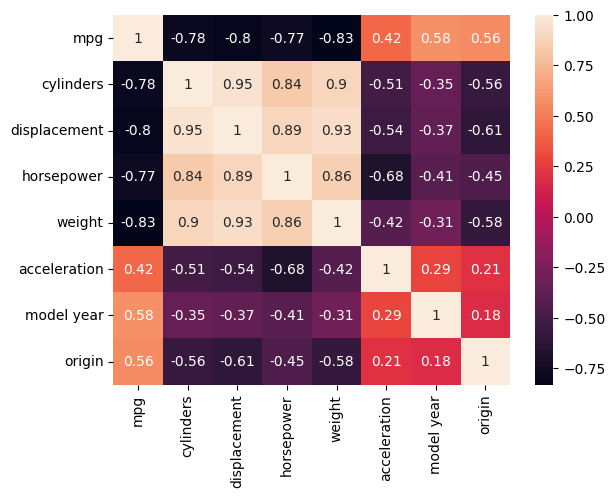

In [16]:
sns.heatmap(df.corr(),annot=True)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='mpg'),df['mpg'],test_size=0.2,random_state=42)

In [40]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
model.score(X_train,y_train)

0.813954121383177

In [43]:
y_predict = model.predict(X_test)
y_predict

array([32.86345735, 29.58130242, 21.35126058, 16.80568721, 12.50136229,
       27.2147352 , 27.91706204,  9.80597699, 16.8835806 , 21.90677435,
       12.82048165, 36.1456343 , 25.2019794 , 13.69659447, 23.97913163,
        6.37500508, 29.55756086, 23.5958146 , 16.34167304, 36.29467019,
       23.70665699, 18.97681255, 28.73644275, 28.76794308, 14.97294014,
       34.6943012 , 25.49550117, 24.95277838, 21.95427152,  8.76617462,
       28.43608372, 34.86653432, 20.52354553, 26.07522613, 34.2452672 ,
       12.05304831, 22.95630341, 21.76491284, 12.32598716, 26.76111869,
       26.26561689, 27.42473085, 20.16065747,  7.33443755, 24.52997115,
       34.94517905, 26.73730729, 24.21492076, 22.53555783, 27.5600991 ,
       22.68274634, 33.65703138, 32.66547111, 10.9775402 , 27.72572065,
        9.99858939, 19.76803963, 29.86632671, 23.18389657, 20.4544621 ,
       16.21542068, 32.07446683, 24.02402656, 20.50440401, 20.92265399,
       25.50517507, 25.12532397, 32.39195599, 28.10414243, 12.69

In [49]:
# model.score(X_test,y_test)
r2_score(y_test,y_predict)

0.8475731044779437